# **Actividad NLP 1.0 - Creación de Diccionario**
---
Diego Sú Gómez - A01620476

## **Importación de librerías**
---

In [1]:
#Instalar NLTK
#!pip install nltk
#!pip install wordcloud

In [2]:
#Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
from wordcloud import WordCloud
from nltk.metrics.distance import edit_distance
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## **Contador de Palabras**
---
El objetivo es realizar un conteo de las palabras de un texto, el archivo de entrada puede ser de cualquier formato, pero debe de entregar un histograma del mismo.

In [3]:
#Leer el archivo de entrada
nltk.download('semcor')
from nltk.corpus import semcor

[nltk_data] Downloading package semcor to
[nltk_data]     C:\Users\diego\AppData\Roaming\nltk_data...
[nltk_data]   Package semcor is already up-to-date!


In [4]:
#Almacenar el texto a usar
texto = semcor.words()
print(texto)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [5]:
#Contar las palabras del corpus
cuenta_texto = Counter(texto)

In [6]:
#Obtener las palabras y sus frecuencias para graficar el histograma
cuenta_texto = sorted(cuenta_texto.items(), key=lambda word: word[1], reverse=True)
palabras, frecuencia = zip(*cuenta_texto)

In [7]:
print(palabras)
print(frecuencia)

('the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'that', 'is', 'was', '``', 'for', "''", 'The', 'with', 'it', 'he', 'on', 'as', 'be', 'his', "'s", 'I', 'by', 'had', 'at', 'are', 'not', '-', 'from', 'or', 'this', 'have', 'an', 'which', 'were', 'you', 'He', 'but', 'they', 'one', 'would', ';', 'all', 'their', 'has', 'her', 'him', '?', 'been', 'will', 'It', ')', 'more', '(', 'who', 'out', 'we', "n't", 'said', 'there', 'can', 'she', 'up', ':', 'than', 'into', 'its', 'no', 'them', 'could', 'about', 'In', 'so', 'when', 'do', '*', 'only', 'other', 'time', 'what', 'if', 'some', 'two', 'But', 'did', 'may', 'any', 'A', 'over', 'first', 'such', 'like', 'man', 'these', "'", 'This', 'made', 'our', 'my', 'new', 'most', 'now', 'then', 'must', 'also', 'me', 'years', 'even', 'They', 'through', 'back', 'many', 'your', 'There', 'way', 'before', 'Mr.', 'where', 'much', 'She', 'down', 'f', 'should', 'And', 'people', 'each', 'after', 'too', 'good', 'year', 'We', 'If', 'make', '!', 'those', 'just', 'because', 

In [8]:
#Obtener las palabras y sus frecuencias para graficar el histograma
palabrasdf = pd.DataFrame({"Palabras":palabras, "Frecuencia":frecuencia})
palabrasdf.head()

,Palabras,Frecuencia
0,the,44018
1,",",40614
2,.,34716
3,of,24832
4,and,19370


In [9]:
palabrasdf.shape

(43416, 2)

Text(0.5, 1.0, 'Histograma de las palabras del Corpus Semcor')

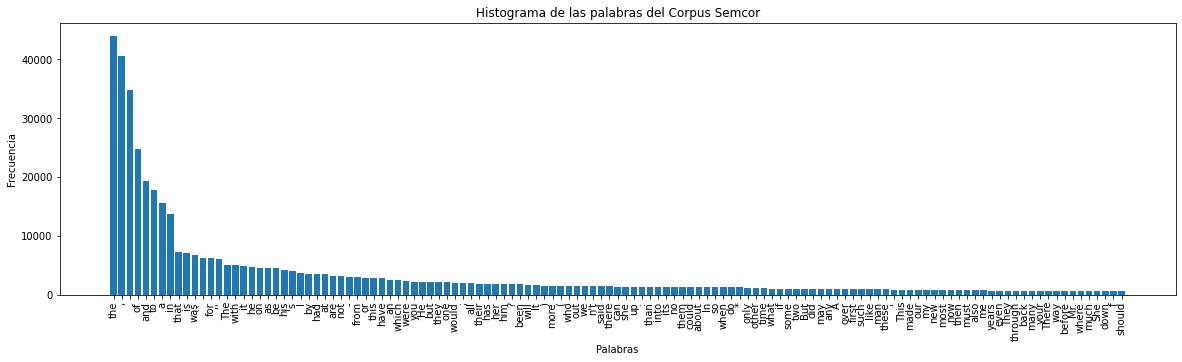

In [10]:
#Realizar el histograma
palabrashist = palabrasdf.iloc[:125,:]
plt.figure(figsize=(20,5))
plt.bar(x=palabrashist["Palabras"],height=palabrashist["Frecuencia"])
plt.xticks(rotation=90)
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Histograma de las palabras del Corpus Semcor")

## **Nube de Palabras**
---
Realizar una nube de palabras a partir del corpus obtenido de su base de datos de proyecto o el corpus de cualquier libro.


In [11]:
#Concatenar las palabras para formar un texto entero
txt = " ".join(texto)

(-0.5, 999.5, 349.5, -0.5)

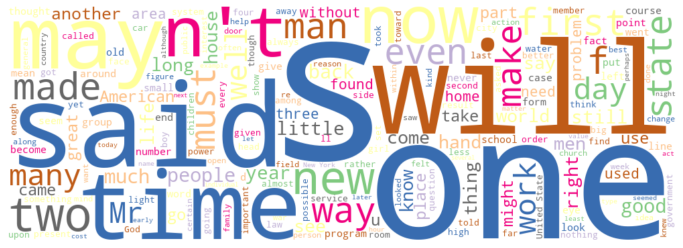

In [12]:
#Crear la nube de palabras
nube = WordCloud(width=1000,height=350, background_color="white", colormap="Accent").generate_from_text(txt)
plt.figure(figsize=(12,6))
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")

## **Creación de un diccionario de palabras**
---

In [13]:
#Crear el diccionario de palabras del corpus anterior
diccionario = {}
            
for oracion in semcor.tagged_sents():
    for palabra in oracion:
        if palabra.label(): #Si la palabra/chunk tiene un tag de Part Of Speech
            for p in palabra.leaves(): #Iterar sobre ese chunk para guardar la palabra y su tag
                p_i = p.lower()
                diccionario[p] = palabra.label()

In [14]:
#Mostrar el diccionario generado
diccionario

{'The': 'DT',
 'Fulton': 'NNP',
 'County': 'NNP',
 'Grand': 'NNP',
 'Jury': 'NN',
 'said': 'VB',
 'Friday': 'NNP',
 'an': 'DT',
 'investigation': 'NN',
 'of': 'VB',
 'Atlanta': 'NNP',
 "'s": 'POS',
 'recent': 'JJ',
 'primary': 'JJ',
 'election': 'NN',
 'produced': 'VB',
 'no': 'DT',
 'evidence': 'NN',
 'that': 'IN',
 'any': 'DT',
 'irregularities': 'NNS',
 'took': 'VB',
 'place': 'NN',
 'jury': 'NN',
 'further': 'VB',
 'in': 'IN',
 'term': 'NN',
 'end': 'NN',
 'presentments': 'NN',
 'the': 'DT',
 'City': 'NNP',
 'Executive': 'NNP',
 'Committee': 'NNP',
 'which': 'WDT',
 'had': 'VBD',
 'over-all': 'JJ',
 'charge': 'NN',
 'deserves': 'VB',
 'praise': 'NN',
 'and': 'CC',
 'thanks': 'NNS',
 'for': 'IN',
 'manner': 'NN',
 'was': 'VB',
 'conducted': 'VB',
 'September': 'NNP',
 'October': 'NNP',
 'been': 'VB',
 'charged': 'VB',
 'by': 'IN',
 'Superior': 'NNP',
 'Court': 'NN',
 'Judge': 'VB',
 'Durwood': 'NNP',
 'Pye': 'NNP',
 'to': 'TO',
 'investigate': 'VB',
 'reports': 'NNS',
 'possible': '

## **Realizar una corrección del texto con respecto al diccionario usando cálculo de distancia de “strings”.**
---

In [15]:
#Encontrar la distancia más cercana a la palabra recibida
def distancia_minima(palabra_error, diccionario):
    correccion = None
    mindist = float("inf")

    for palabra in diccionario:
        dist = edit_distance(palabra_error, palabra) #Hallar la distancia entre la palabra y la palabra actual
        if dist < mindist:
            mindist = dist
            correccion = palabra

    return correccion #Regresar la palabra con la menor distancia a la actual

In [16]:
#Definir una función que corrija un texto en base al diccionario de palabras
def corregir_texto(texto, diccionario):
    palabras_txt = nltk.word_tokenize(texto)
    correcciones =[]

    #Iterar a través del texto
    for palabra in palabras_txt:
        palabra = palabra.lower()
        if palabra in diccionario: #Si está en el diccionario, guardar la palabra
            correcciones.append(palabra)
        else:
            correccion = distancia_minima(palabra, diccionario) #Encontrar la distancia más corta entre palabras
            correcciones.append(correccion) 
    
    txt_corregido = ' '.join(correcciones) #Concatenar las palabras en un texto 
    return txt_corregido

In [17]:
#Generar un texto con palabras que no estén en el diccionario y encontrar las correcciones
t = "Teh jury of Atalnta took lpace on Fdriay with several mebemrs of hte cuoncil pesrent"
t_corregido = corregir_texto(t, diccionario)
print("Texto Original:",t)
print("Texto Corregido:",t_corregido)

Texto Original: Teh jury of Atalnta took lpace on Fdriay with several mebemrs of hte cuoncil pesrent
Texto Corregido: ten jury of Atlanta took pace on Adrian with several members of he council present
